In [21]:
import os
import re
import pandas as pd

def parse_file_name(file_name):
    # Extract the base name (remove the directory path)
    base_name = os.path.basename(file_name)
    
    # Remove the file extension
    base_name = os.path.splitext(base_name)[0]
    
    # Split by underscores and parse the key-value pairs
    parts = base_name.split("_")
    
    # Initialize the dictionary
    parsed_data = {"model": parts[0]}  # First part is the model name
    
    print(parts)
    
    for part in parts[1:]:
        if "=" in part:  # Look for key-value pairs
            key, value = part.split("=", 1)
            # Try to convert value to int or float, if possible
            try:
                value = int(value)
            except ValueError:
                try:
                    value = float(value)
                except ValueError:
                    pass
            parsed_data[key] = value
    
    return parsed_data

def convert_value(value):
    """Convert hyperparameter values to appropriate types."""
    try:
        if '.' in value:
            return float(value)
        return int(value)
    except ValueError:
        return value

def read_training_results(filepath):
    """Read the training results CSV into a DataFrame."""
    return pd.read_csv(filepath)

def aggregate_results(files):
    """Aggregate results from multiple files into a single DataFrame."""
    all_results = []
    
    for file in files:
        # Parse model type and hyperparameters from filename
        parsed_data = parse_file_name(file)
        if not parsed_data:
            continue
        
        # Read training results
        results = read_training_results(file)
        
        # Compute summary metrics
        summary = {
            'min_loss': results['Loss'].min(),
            'final_rmse': results['RMSE'].iloc[-1],
            'final_mae': results['MAE'].iloc[-1],
            **parsed_data
        }
        
        all_results.append(summary)
    
    return pd.DataFrame(all_results)

def compare_models(results_df):
    """Compare baseline and improved models based on shared hyperparameters."""
    # Group by hyperparameters
    group_cols = ['factors', 'optimizer', 'lr']
    comparison = results_df.groupby(group_cols + ['model']).agg(
        min_loss=('min_loss', 'mean'),
        final_rmse=('final_rmse', 'mean'),
        final_mae=('final_mae', 'mean')
    ).unstack(level='model')
    
    # Calculate deltas between baseline and improved
    comparison['delta_loss'] = comparison[('min_loss', 'improved')] - comparison[('min_loss', 'baseline')]
    comparison['delta_rmse'] = comparison[('final_rmse', 'improved')] - comparison[('final_rmse', 'baseline')]
    comparison['delta_mae'] = comparison[('final_mae', 'improved')] - comparison[('final_mae', 'baseline')]
    
    return comparison

# Usage
metrics_path = "../data/validations"

# Replace with the path where your files are stored
files = [os.path.join(metrics_path, f) for f in os.listdir(metrics_path) if f.endswith('.csv')]

# Aggregate results
results_df = aggregate_results(files)

# Compare models
comparison_df = compare_models(results_df)

# Save comparison results
comparison_df.to_csv("model_comparison.csv")


['baseline', 'n', 'factors=8', 'optimizer=BCD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=16', 'optimizer=BCD', 'lr=0.005', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['baseline', 'n', 'factors=8', 'optimizer=BCD', 'lr=0.0025', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=16', 'optimizer=SGD', 'lr=0.001', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['baseline', 'n', 'factors=2', 'optimizer=SGD', 'lr=0.0025', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=2', 'optimizer=SGD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=16', 'optimizer=BCD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=2', 'optimizer=BCD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=32', 'optimizer=BCD', 'lr=0.0025', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20'

In [37]:
import os
import pandas as pd

def parse_file_name(file_name):
    # Extract the base name (remove the directory path)
    base_name = os.path.basename(file_name)
    
    # Remove the file extension
    base_name = os.path.splitext(base_name)[0]
    
    # Split by underscores and parse the key-value pairs
    parts = base_name.split("_")
    
    # Initialize the dictionary
    parsed_data = {"model": parts[0]}  # First part is the model name
    
    print(parts)
    
    for part in parts[1:]:
        if "=" in part:  # Look for key-value pairs
            key, value = part.split("=", 1)
            # Try to convert value to int or float, if possible
            try:
                value = int(value)
            except ValueError:
                try:
                    value = float(value)
                except ValueError:
                    pass
            parsed_data[key] = value
    
    return parsed_data

def read_training_results(file):
    """Read training results from a CSV file."""
    return pd.read_csv(file)

def aggregate_results(files):
    """Aggregate results from multiple files into a single DataFrame."""
    all_results = []
    
    for file in files:
        # Parse model type and hyperparameters from filename
        parsed_data = parse_file_name(file)
        if not parsed_data:
            continue
        
        # Read training results
        results = read_training_results(file)
        
        # Compute summary metrics
        summary = {
            'min_loss': results['Loss'].min(),
            'final_rmse': results['RMSE'].iloc[-1],
            'final_mae': results['MAE'].iloc[-1],
            **parsed_data
        }
        
        all_results.append(summary)
    
    return pd.DataFrame(all_results)

def compare_models(results_df):
    """Compare baseline and improved models based on shared hyperparameters."""
    # Group by hyperparameters
    group_cols = ['factors', 'optimizer', 'lr']
    comparison = results_df.groupby(group_cols + ['model']).agg(
        min_loss=('min_loss', 'mean'),
        final_rmse=('final_rmse', 'mean'),
        final_mae=('final_mae', 'mean')
    ).unstack(level='model')
    
    # Flatten the multi-level columns
    comparison.columns = [f'{col[1]}_{col[0]}' for col in comparison.columns]
    
    # Calculate deltas between baseline and improved
    comparison['delta_loss'] = comparison['improved_min_loss'] - comparison['baseline_min_loss']
    comparison['delta_rmse'] = comparison['improved_final_rmse'] - comparison['baseline_final_rmse']
    comparison['delta_mae'] = comparison['improved_final_mae'] - comparison['baseline_final_mae']
    
    return comparison

# Usage
metrics_path = "../data/validations"

# Replace with the path where your files are stored
files = [os.path.join(metrics_path, f) for f in os.listdir(metrics_path) if f.endswith('.csv')]

# Aggregate results
results_df = aggregate_results(files)

# Compare models
comparison_df = compare_models(results_df)

# Save comparison results
comparison_df.to_csv("model_comparison_.csv")

# Show the final DataFrame
print(comparison_df)


['baseline', 'n', 'factors=8', 'optimizer=BCD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=16', 'optimizer=BCD', 'lr=0.005', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['baseline', 'n', 'factors=8', 'optimizer=BCD', 'lr=0.0025', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=16', 'optimizer=SGD', 'lr=0.001', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['baseline', 'n', 'factors=2', 'optimizer=SGD', 'lr=0.0025', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=2', 'optimizer=SGD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=16', 'optimizer=BCD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=2', 'optimizer=BCD', 'lr=0.01', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20']
['improved', 'n', 'factors=32', 'optimizer=BCD', 'lr=0.0025', 'reg=0.02', 'batch', 'size=128', 'n', 'epochs=20'

In [17]:
import os

def parse_file_name(file_name):
    # Extract the base name (remove the directory path)
    base_name = os.path.basename(file_name)
    
    # Remove the file extension
    base_name = os.path.splitext(base_name)[0]
    
    # Split by underscores and parse the key-value pairs
    parts = base_name.split("_")
    
    # Initialize the dictionary
    parsed_data = {"model": parts[0]}  # First part is the model name
    
    for part in parts[1:]:
        if "=" in part:  # Look for key-value pairs
            key, value = part.split("=", 1)
            # Try to convert value to int or float, if possible
            try:
                value = int(value)
            except ValueError:
                try:
                    value = float(value)
                except ValueError:
                    pass
            parsed_data[key] = value
    
    return parsed_data

# Example usage
file_name = "../data/validations/baseline_n_factors=8_optimizer=BCD_lr=0.01_reg=0.02_batch_size=128_n_epochs=20.csv"
result = parse_file_name(file_name)
print(result)


{'model': 'baseline', 'factors': 8, 'optimizer': 'BCD', 'lr': 0.01, 'reg': 0.02, 'size': 128, 'epochs': 20}


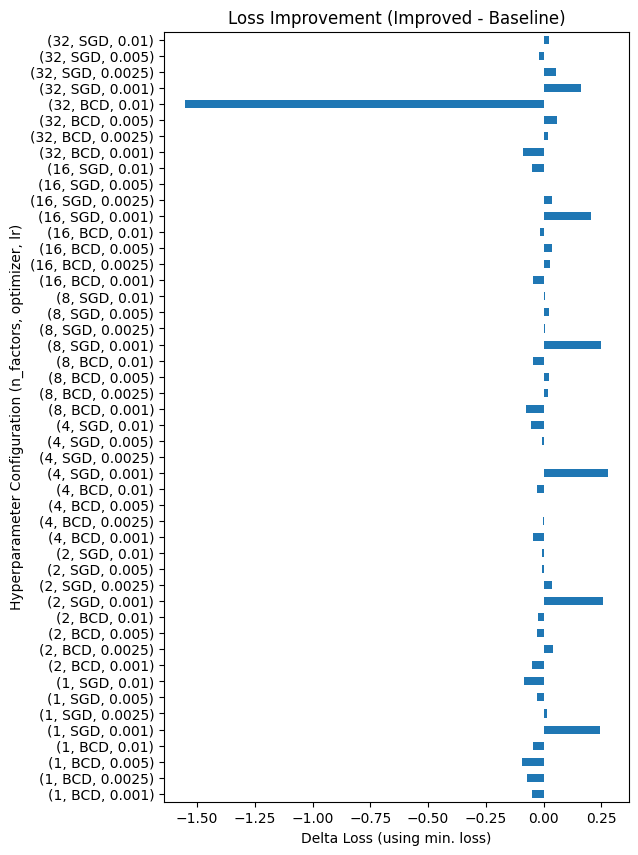

In [29]:
import matplotlib.pyplot as plt

comparison_df['delta_loss'].plot(kind='barh', figsize=(6, 10), title='Loss Improvement (Improved - Baseline)')
plt.xlabel('Delta Loss (using min. loss)')
plt.ylabel('Hyperparameter Configuration (n_factors, optimizer, lr)')
plt.show()

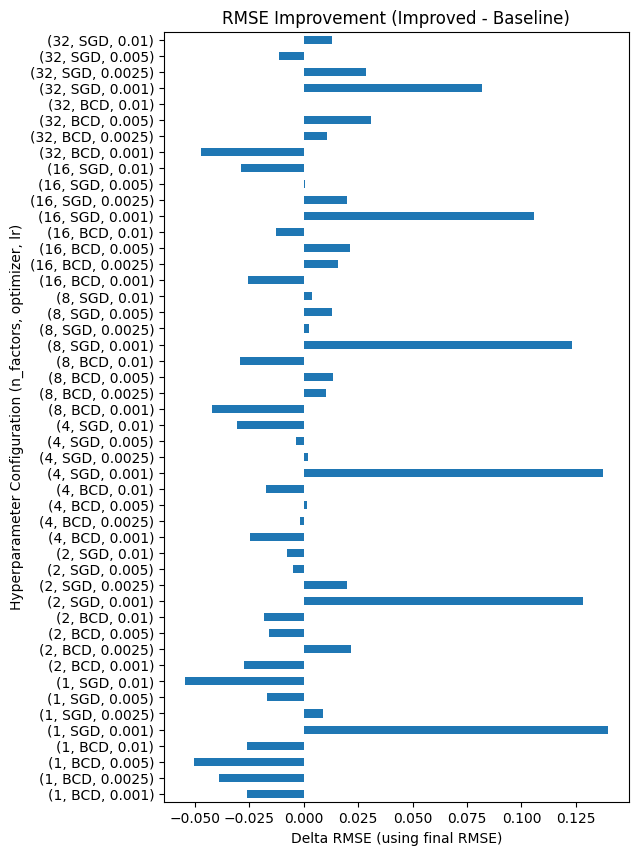

In [30]:
comparison_df['delta_rmse'].plot(kind='barh', figsize=(6, 10), title='RMSE Improvement (Improved - Baseline)')
plt.xlabel('Delta RMSE (using final RMSE)')
plt.ylabel('Hyperparameter Configuration (n_factors, optimizer, lr)')
plt.show()

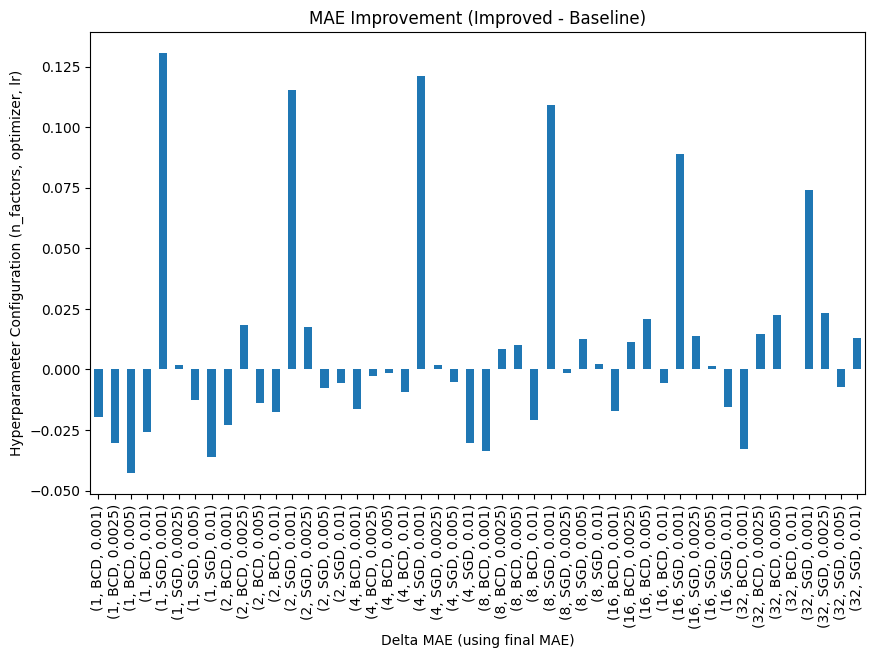

In [ ]:
comparison_df['delta_mae'].plot(kind='bar', figsize=(6, 10), title='MAE Improvement (Improved - Baseline)')
plt.xlabel('Delta MAE (using final MAE)')
plt.ylabel('Hyperparameter Configuration (n_factors, optimizer, lr)')
plt.show()

In [40]:
comparison_df

baseline_min_loss  improved_min_loss  \
factors optimizer lr                                             
1       BCD       0.0010           0.889248           0.840756   
                  0.0025           0.880794           0.808752   
                  0.0050           0.884803           0.792322   
                  0.0100           0.834450           0.790057   
        SGD       0.0010           0.930208           1.174506   
                  0.0025           0.845811           0.862020   
                  0.0050           0.838519           0.808312   
                  0.0100           0.894283           0.809448   
2       BCD       0.0010           0.901236           0.849956   
                  0.0025           0.814853           0.854159   
                  0.0050           0.827402           0.798154   
                  0.0100           0.810053           0.784315   
        SGD       0.0010           0.891408           1.150138   
                  0.0025           0.808793           0.845256   
                  0.0050           0.806132           0.797412   
                  0.0100           0.820736           0.812680   
4       BCD       0.0010           0.878994           0.833491   
                  0.0025           0.810703           0.807726   
                  0.0050           0.779409           0.781822   
                  0.0100           0.779831           0.752169   
        SGD       0.0010           0.884250           1.161894   
                  0.0025           0.812504           0.816224   
                  0.0050           0.792056           0.785588   
                  0.0100           0.803370           0.749204   
8       BCD       0.0010           0.899400           0.821107   
                  0.0025           0.799945           0.817992   
                  0.0050           0.751789           0.775364   
                  0.0100           0.765882           0.721855   
        SGD       0.0010           0.887612           1.135528   
                  0.0025           0.820438           0.825031   
                  0.0050           0.733570           0.756198   
                  0.0100           0.746845           0.753391   
16      BCD       0.0010           0.878267           0.830992   
                  0.0025           0.786362           0.814547   
                  0.0050           0.738993           0.775934   
                  0.0100           0.763929           0.750118   
        SGD       0.0010           0.838856           1.043705   
                  0.0025           0.804663           0.840599   
                  0.0050           0.754946           0.756891   
                  0.0100           0.784808           0.735729   
32      BCD       0.0010           0.907921           0.820171   
                  0.0025           0.783892           0.802923   
                  0.0050           0.734225           0.790138   
                  0.0100           2.312715           0.760709   
        SGD       0.0010           0.870519           1.030320   
                  0.0025           0.791827           0.843663   
                  0.0050           0.772660           0.752963   
                  0.0100           0.747514           0.771017   

                          baseline_final_rmse  improved_final_rmse  \
factors optimizer lr                                                 
1       BCD       0.0010             0.942999             0.916927   
                  0.0025             0.938506             0.899306   
                  0.0050             0.940640             0.890125   
                  0.0100             0.916976             0.890934   
        SGD       0.0010             0.964473             1.104184   
                  0.0025             0.919680             0.928450   
                  0.0050             0.915810             0.899062   
                  0.0100             0.955172             0.900598   
2       BCD       0.0010 

In [42]:
print(comparison_df.columns)

Index(['baseline_min_loss', 'improved_min_loss', 'baseline_final_rmse',
       'improved_final_rmse', 'baseline_final_mae', 'improved_final_mae',
       'delta_loss', 'delta_rmse', 'delta_mae'],
      dtype='object')


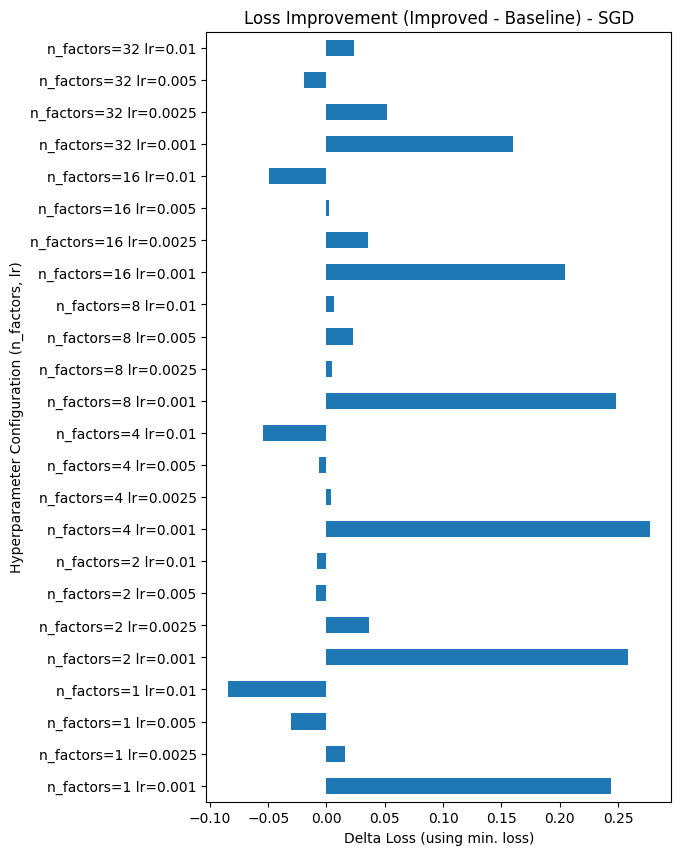

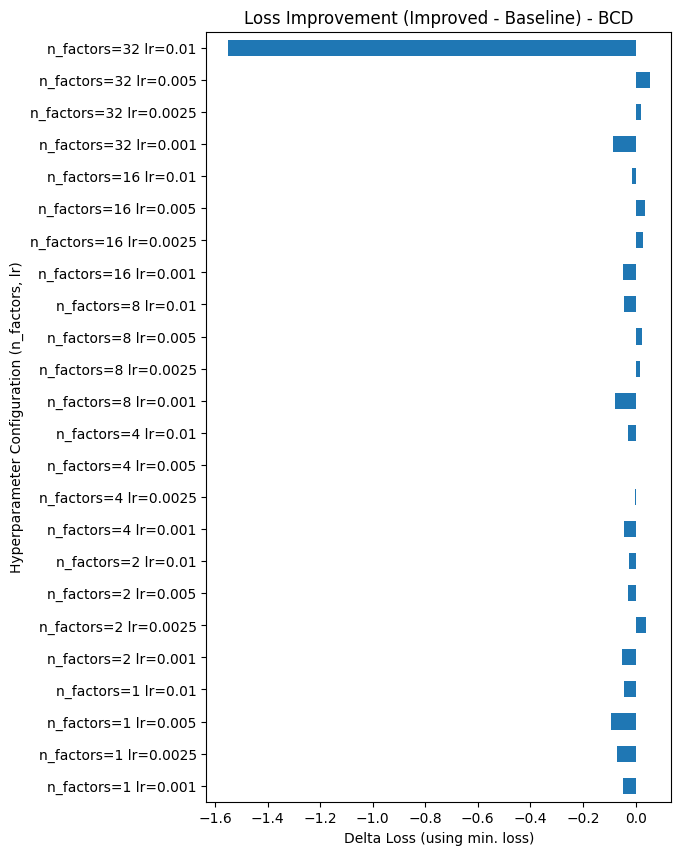

In [45]:
import matplotlib.pyplot as plt

# Reset the index so 'optimizer' becomes a column, and we can use it for filtering
comparison_df_reset = comparison_df.reset_index()

# Filter the DataFrame for each optimizer
sgd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'SGD']
bcd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'BCD']

# Plot for SGD
plt.figure(figsize=(6, 10))
sgd_comparison_df['delta_loss'].plot(kind='barh', title='Loss Improvement (Improved - Baseline) - SGD')

# Set labels and title
plt.xlabel('Delta Loss (using min. loss)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in sgd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

plt.show()

# Plot for BCD
plt.figure(figsize=(6, 10))
bcd_comparison_df['delta_loss'].plot(kind='barh', title='Loss Improvement (Improved - Baseline) - BCD')

# Set labels and title
plt.xlabel('Delta Loss (using min. loss)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in bcd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

plt.show()


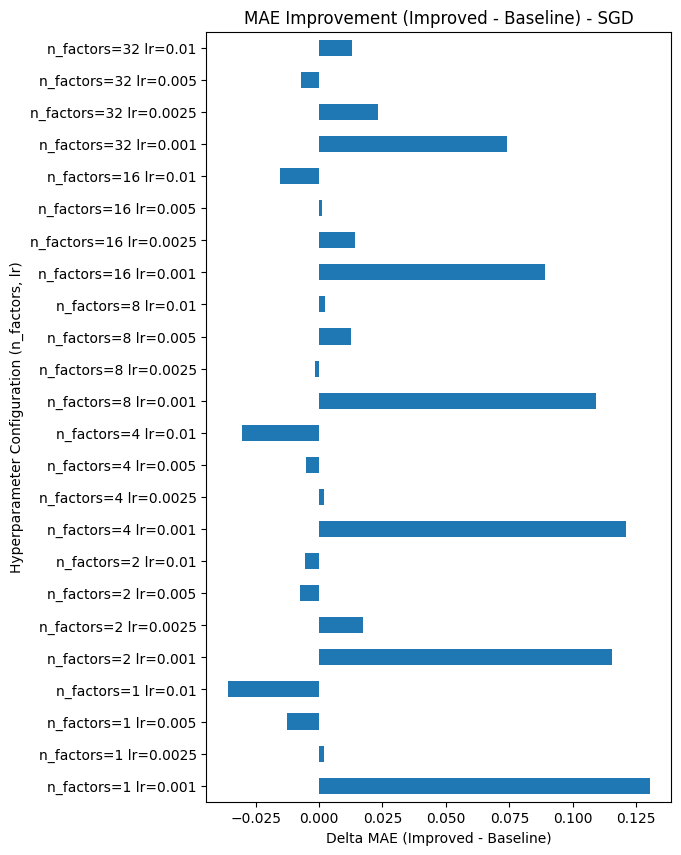

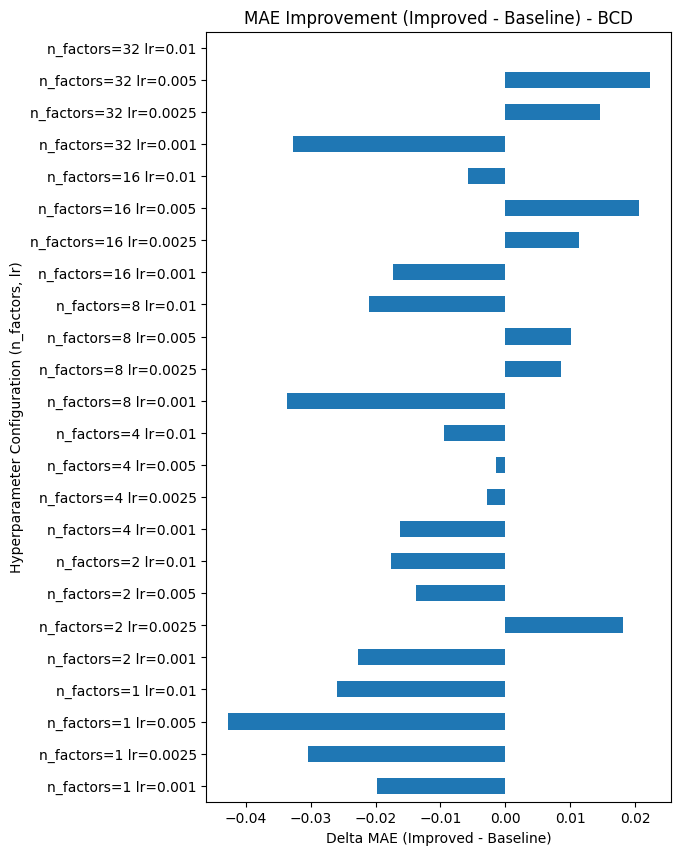

In [46]:
import matplotlib.pyplot as plt

# Reset the index so 'optimizer' becomes a column, and we can use it for filtering
comparison_df_reset = comparison_df.reset_index()

# Filter the DataFrame for each optimizer
sgd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'SGD']
bcd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'BCD']

# Plot for SGD (delta_mae)
plt.figure(figsize=(6, 10))
sgd_comparison_df['delta_mae'].plot(kind='barh', title='MAE Improvement (Improved - Baseline) - SGD')

# Set labels and title
plt.xlabel('Delta MAE (Improved - Baseline)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in sgd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

plt.show()

# Plot for BCD (delta_mae)
plt.figure(figsize=(6, 10))
bcd_comparison_df['delta_mae'].plot(kind='barh', title='MAE Improvement (Improved - Baseline) - BCD')

# Set labels and title
plt.xlabel('Delta MAE (Improved - Baseline)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in bcd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

plt.show()


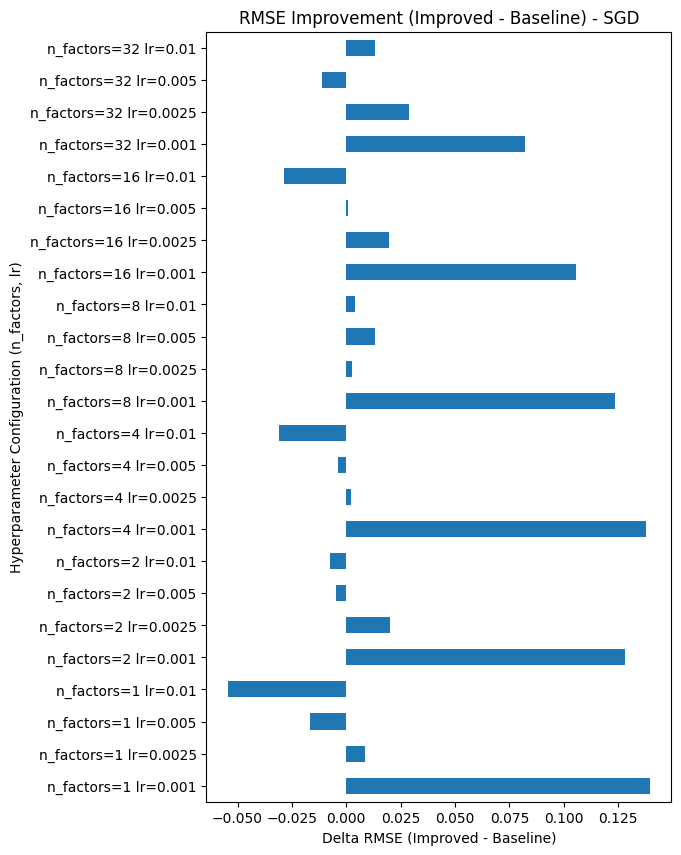

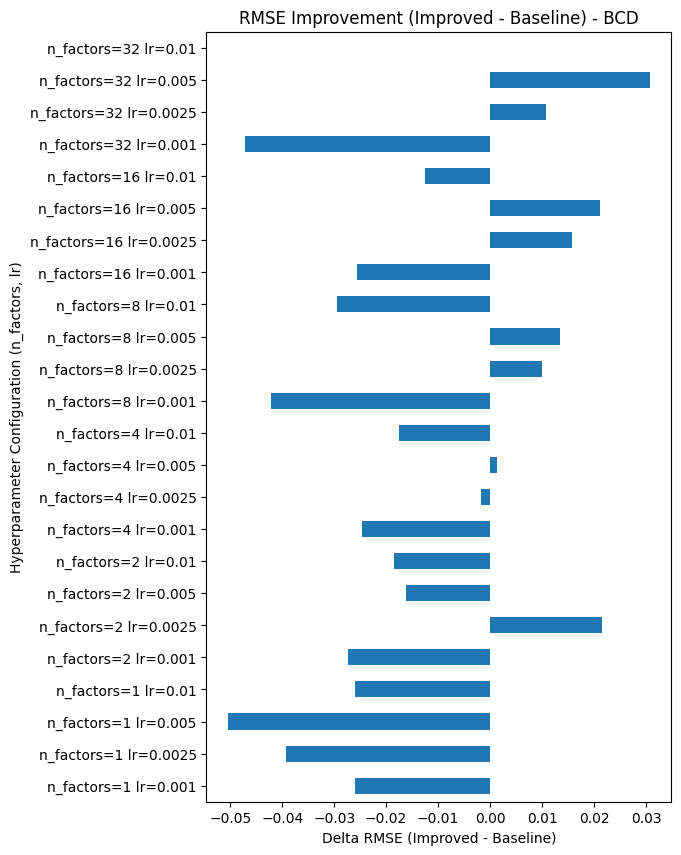

In [47]:
import matplotlib.pyplot as plt

# Reset the index so 'optimizer' becomes a column, and we can use it for filtering
comparison_df_reset = comparison_df.reset_index()

# Filter the DataFrame for each optimizer
sgd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'SGD']
bcd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'BCD']

# Plot for SGD (delta_rmse)
plt.figure(figsize=(6, 10))
sgd_comparison_df['delta_rmse'].plot(kind='barh', title='RMSE Improvement (Improved - Baseline) - SGD')

# Set labels and title
plt.xlabel('Delta RMSE (Improved - Baseline)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in sgd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

plt.show()

# Plot for BCD (delta_rmse)
plt.figure(figsize=(6, 10))
bcd_comparison_df['delta_rmse'].plot(kind='barh', title='RMSE Improvement (Improved - Baseline) - BCD')

# Set labels and title
plt.xlabel('Delta RMSE (Improved - Baseline)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in bcd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

plt.show()


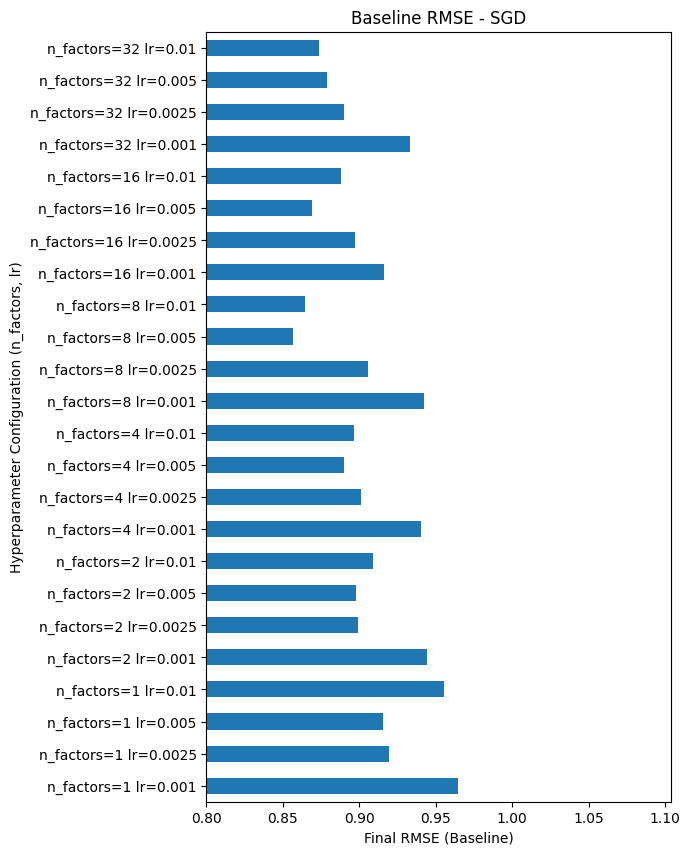

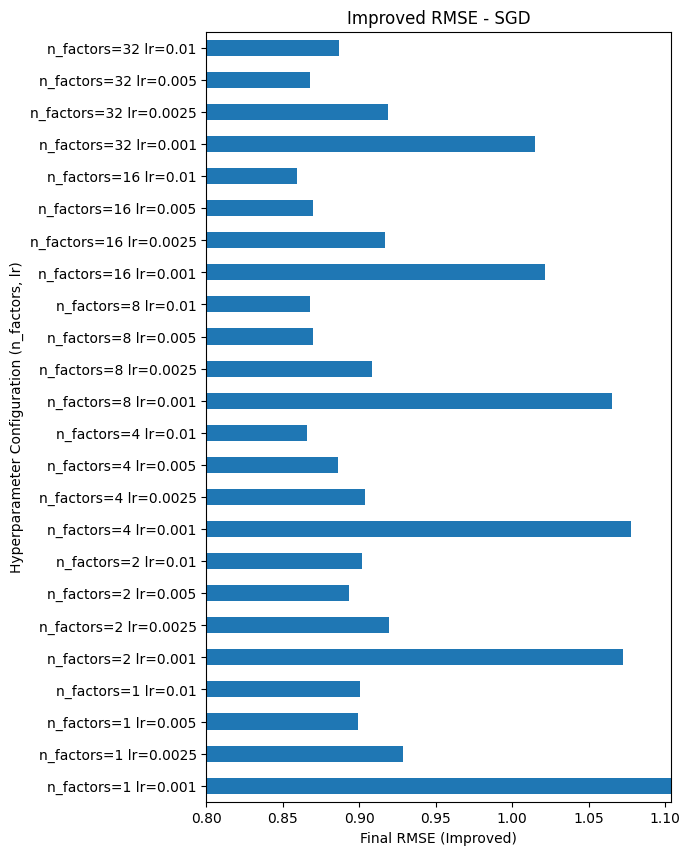

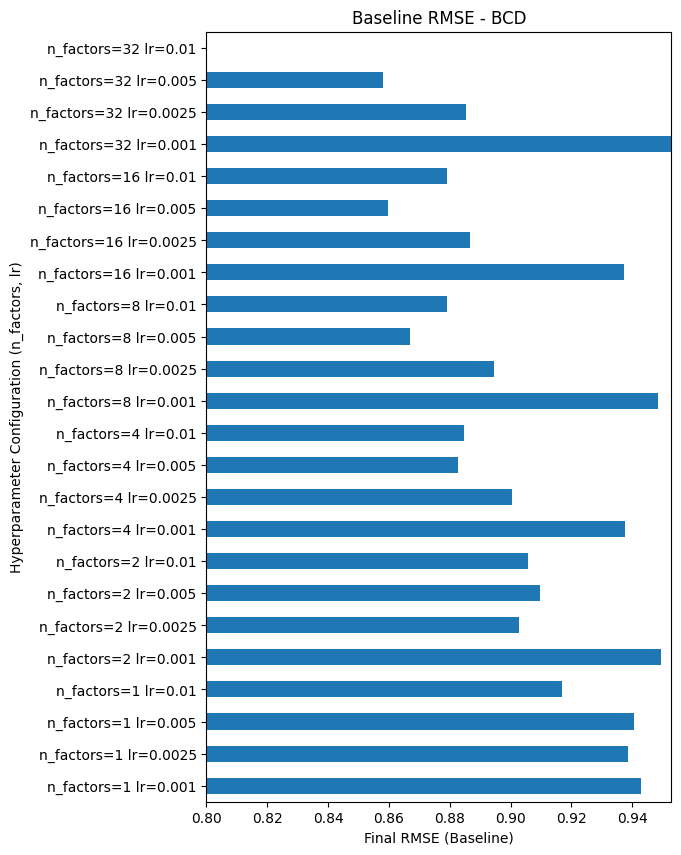

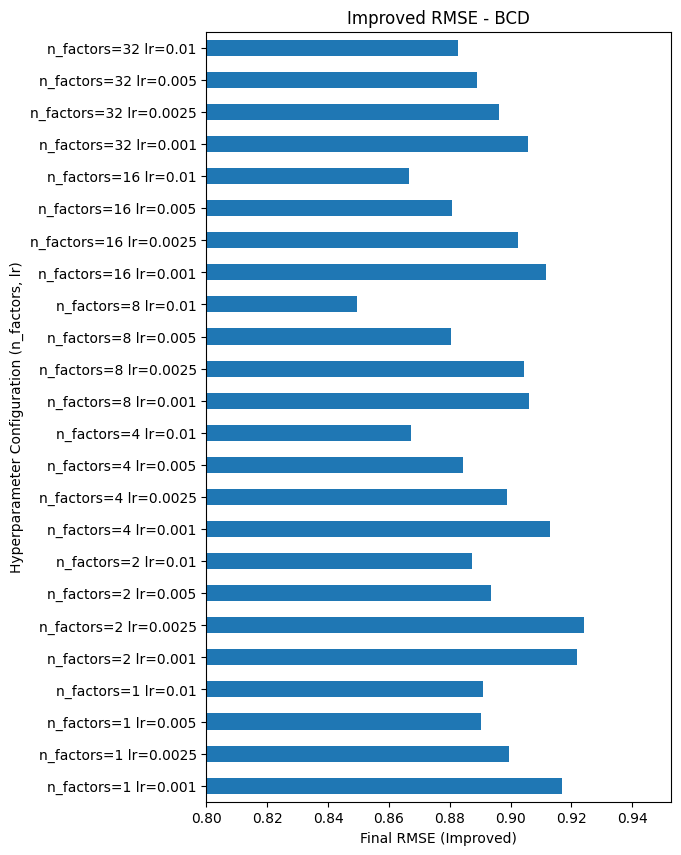

In [49]:
import matplotlib.pyplot as plt

# Reset the index so 'optimizer' becomes a column, and we can use it for filtering
comparison_df_reset = comparison_df.reset_index()

# Filter the DataFrame for each optimizer
sgd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'SGD']
bcd_comparison_df = comparison_df_reset[comparison_df_reset['optimizer'] == 'BCD']

# Plot for SGD Baseline (final RMSE)
plt.figure(figsize=(6, 10))
sgd_comparison_df['baseline_final_rmse'].plot(kind='barh', title='Baseline RMSE - SGD')

# Set labels and title
plt.xlabel('Final RMSE (Baseline)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in sgd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

# Set x-axis limit to start from 0.8
plt.xlim(0.8, max(sgd_comparison_df['baseline_final_rmse'].max(), sgd_comparison_df['improved_final_rmse'].max()))

plt.show()

# Plot for SGD Improved (final RMSE)
plt.figure(figsize=(6, 10))
sgd_comparison_df['improved_final_rmse'].plot(kind='barh', title='Improved RMSE - SGD')

# Set labels and title
plt.xlabel('Final RMSE (Improved)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in sgd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

# Set x-axis limit to start from 0.8
plt.xlim(0.8, max(sgd_comparison_df['baseline_final_rmse'].max(), sgd_comparison_df['improved_final_rmse'].max()))

plt.show()

# Plot for BCD Baseline (final RMSE)
plt.figure(figsize=(6, 10))
bcd_comparison_df['baseline_final_rmse'].plot(kind='barh', title='Baseline RMSE - BCD')

# Set labels and title
plt.xlabel('Final RMSE (Baseline)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in bcd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

# Set x-axis limit to start from 0.8
plt.xlim(0.8, max(bcd_comparison_df['baseline_final_rmse'].max(), bcd_comparison_df['improved_final_rmse'].max()))

plt.show()

# Plot for BCD Improved (final RMSE)
plt.figure(figsize=(6, 10))
bcd_comparison_df['improved_final_rmse'].plot(kind='barh', title='Improved RMSE - BCD')

# Set labels and title
plt.xlabel('Final RMSE (Improved)')
plt.ylabel('Hyperparameter Configuration (n_factors, lr)')

# Set the y-axis labels to be the combination of n_factors and lr (without optimizer)
y_labels = [f"n_factors={row['factors']} lr={row['lr']}" for _, row in bcd_comparison_df.iterrows()]
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)

# Set x-axis limit to start from 0.8
plt.xlim(0.8, max(bcd_comparison_df['baseline_final_rmse'].max(), bcd_comparison_df['improved_final_rmse'].max()))

plt.show()
